In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("bright")

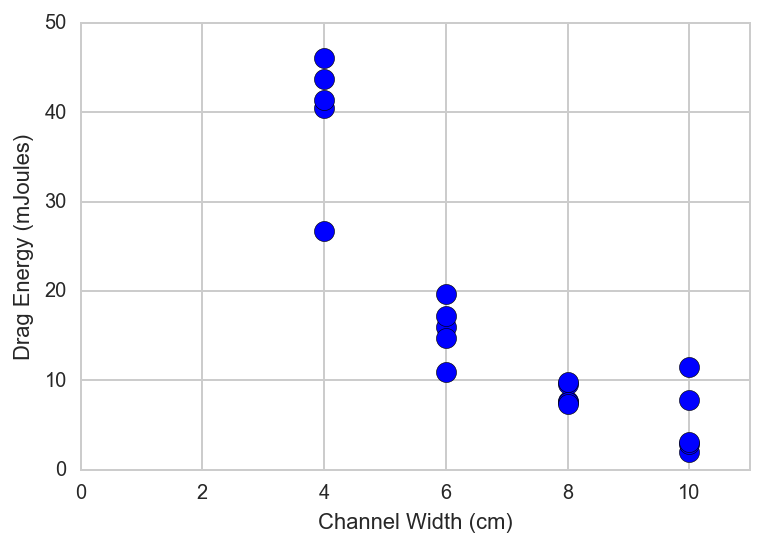

In [18]:
import plotly.plotly as py
import plotly.tools as tls

# figure, axarr = plt.subplots(1) 

#Drag Energy Values Per Experiment
#[4,6,8,10]cms
#These are in milli Joules!!!!!
y = [[43.7517281399,40.5095916734,46.0396065548,41.3447699641,26.7173180728],
     [16.0091360348,17.1934198813,19.6689776828,10.963293453,14.7849611848],
     [7.67721674383,9.54039749662,7.53230578126,7.31788106526,9.78851015352],
     [1.9878490957,7.79337248744,2.89737072701,11.512361768,3.09771914392]]

x = [[4]*5,[6]*5,[8]*5,[10]*5]

y = reduce(lambda a,b: a+b, y)
x = reduce(lambda a,b: a+b, x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y,s=100)
# ax.ylabel('Drag Energy (mJ)')
# ax.xlabel('Channel Width (cm)')
# ax.spines['left'].set_position('zero')
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_xlabel("Channel Width (cm)")
ax.set_ylabel("Drag Energy (mJ)")
# ax.show()



